**นักศึกษาผู้จัดทำ**
*   พชร นิมมลรัตน์ รหัสนักศึกษา 65076043



# Customer Segmentation

Dataset นี้บันทึกข้อมูลลูกค้าของบริษัท Telecommunication แห่งหนึ่ง

## Data Description
1. Region : Region code to the area where customers belong
2. Tenure : Their span of choosing the company
3. Age : Age of the customers
4. Income : Their average Salaries (1,000 USD)
5. Marital : Their Martial Status
6. Address : Address Zone
7. Ed : Education Group
8. Employ : Employment Years
9. Retire : Retirement Status
10. Gender : Their Gender
11. Reside : Area Code where they live

## Remark
- ควรตรวจสอบข้อมูลที่มีค่าผิดปกติ
- ควรมีการจัดการข้อมูลที่เป็น missing values (-99)

## Objective:
- ทำการจัดกลุ่มลูกค้า โดยใช้เทคนิค K-means Clustering
  - จำนวนกลุ่มที่เหมาะสมควรเป็นเท่าไหร่
  - อธิบายความแตกต่างระหว่างแต่ละกลุ่มที่จัดออกมาได้
- ทำการจัดกลุ่มลูกค้า โดยใช้เทคนิค Hierarchical Clustering
  - จำนวนกลุ่มที่เหมาะสมควรเป็นเท่าไหร่
  - อธิบายความแตกต่างระหว่างแต่ละกลุ่มที่จัดออกมาได้
- สำหรับโจทย์ข้อนี้ คุณคิดว่าวิธีไหนจัดกลุ่มออกมาได้ดีกว่า K-means Clustering VS. Hierarchical Clustering


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine learning/Miniproject/Telecust.csv')
#df = pd.read_csv('/content/Telecust.csv')

## Step-1 Inspect Data
ในขั้นตอนที่ 1 เราเริ่มต้นจากการสำรวจข้อมูลด้วยชุดคำสั่ง 3 ชุด ดังนี้
1. `.head()` เพื่อดูตัวอย่างข้อมูลในแต่ละฟีเจอร์
2. `.info()` เพื่อดูประเภทข้อมูลในแต่ละคอลัมน์ว่าเป็นประเภท Numerical หรือ Categorical รวมถึงสำรวจหาว่าคอลัมน์ใดมี Missing values
3. `describe()` เพื่อดูค่าทางสถิติของข้อมูลประเภท Numerical ทั้งหมด

เริ่มต้นจากการสำรวจข้อมูลด้วยคำสั่ง `.head()`

In [ ]:
df.head()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside
0,2,13,44,64,1,9,4,5,0,0,2
1,3,11,33,136,1,7,5,5,0,0,6
2,3,68,52,116,1,24,1,29,0,1,2
3,2,33,33,33,0,12,2,0,0,1,1
4,2,23,30,30,1,9,1,2,0,0,4


สำรวจข้อมูลด้วยคำสั่ง `.info()`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   region   1000 non-null   int64
 1   tenure   1000 non-null   int64
 2   age      1000 non-null   int64
 3   income   1000 non-null   int64
 4   marital  1000 non-null   int64
 5   address  1000 non-null   int64
 6   ed       1000 non-null   int64
 7   employ   1000 non-null   int64
 8   retire   1000 non-null   int64
 9   gender   1000 non-null   int64
 10  reside   1000 non-null   int64
dtypes: int64(11)
memory usage: 86.1 KB


จากการตรวจสอบด้วยคำสั่ง `.info()` พบว่าประเภทของข้อมูลทั้งหมดเป็นแบบ Numerical และไม่พบค่าว่าง (Missing Values) เกิดขึ้น ทั้งนี้จำเป็นต้องสำรวจข้อมูลเพิ่มเติมเด้วยคำสั่ง `.describe()` เพื่อตรวจสอบค่าผิดปกติอื่นๆเพิ่มเติม เช่น ค่าที่สูงเกินไป หรือค่าที่ต่ำเกินไป หรือค่าผิดปกติไม่สอดคล้องกับข้อมูลโดยรวม

In [ ]:
df.describe()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.405000,77.273000,0.495000,11.551000,2.721000,11.58700,-0.448000,0.517000,2.331000
std,0.8162,21.359812,14.041158,107.313441,0.500225,10.086681,2.056061,20.06502,6.992868,0.499961,1.435793
min,1.0000,1.000000,-99.000000,-99.000000,0.000000,0.000000,1.000000,-99.00000,-99.000000,0.000000,1.000000
25%,1.0000,17.000000,32.000000,29.000000,0.000000,3.000000,2.000000,3.00000,0.000000,0.000000,1.000000
50%,2.0000,34.000000,40.000000,47.000000,0.000000,9.000000,3.000000,8.00000,0.000000,1.000000,2.000000
75%,3.0000,54.000000,51.000000,83.000000,1.000000,18.000000,4.000000,17.00000,0.000000,1.000000,3.000000
max,3.0000,72.000000,77.000000,1668.000000,1.000000,55.000000,55.000000,444.00000,1.000000,1.000000,8.000000


จากการตรวจสอบข้อมูลในขั้นตอนนี้ เราพบว่ามีค่าผิดปกติอยู่ในหลายคอลัมน์ดังนี้
1. ที่คอลัมน์ `age`, `income`, `employ` และ `retire` พบว่ามีค่าติดลบ `-99` ปะปนอยู่ในข้อมูล  
2. ที่คอลัมน์ `employ` พบว่าค่าสูงสุดคือ `444` ซึ่งมีค่าสูงเกินไปเมื่อเทียบกับค่าเฉลี่ยของข้อมูลทั้งคอลัมน์ที่ `11.58700`
3. ที่คอลัมน์ `ed` พบว่าค่าสูงสุดคือ `55` ซึ่งมีค่าสูงเกินไปเมื่อเทียบกับค่าเฉลี่ยของข้อมูลทั้งคอลัมน์ที่ `2.721000`

ข้อมูลเหล่านี้จำเป็นต้องถูกกำจัดออกเพื่อลดการ bias ของข้อมูลตอนทำโมเดล โดยเราจะกำจัดออกในขั้นตอนที่ 2 คือขั้นตอนทำความสะอาดข้อมูล (Data Cleaning)

## Step-2 Data Cleaning

### 2.1 Missing values
จากการตรวจสอบข้อมูลในขั้นตอนก่อนหน้านี้ เราพบข้อมูลที่มีค่าผิดปกติใน 6 คอลันน์ จึงต้องทำการลบแถวข้อมูลเหล่านี้ด้วยคำสั่ง `.drop()` 

In [ ]:
# Found minimum values at -99 in 4 features age, income, employ and retire
print('df shape before dropping abnormal rows: ', df.shape)

# Dropping abnormal rows, the values are lower 0 (-99)
df.drop(df[df['age'] < 0].index, axis = 0, inplace = True)
df.drop(df[df['income'] < 0].index, axis = 0, inplace = True)
df.drop(df[df['employ'] < 0].index, axis = 0, inplace = True)
df.drop(df[df['retire'] < 0].index, axis = 0, inplace = True)

# Droping abnormal row, the value is too high
df.drop(df[df['ed'] == 55].index, axis = 0, inplace = True)
df.drop(df[df['employ'] == 444].index, inplace = True)

# Recheck the df shape after dropping rows
print('df shape after dropping abnormal rows: ', df.shape)

df shape before dropping abnormal rows:  (1000, 11)
df shape after dropping abnormal rows:  (990, 11)


จากการลบแถวข้อมูลข้างต้น ทำให้จำนวนแถวของ DataFrame ลดลงจาก 1,000 แถว เหลือ 990 แถว จากนั้นเราสำรวจข้อมูลอีกครั้งด้วยคำสั่ง `.describe()` เพื่อตรวจสอบข้อมูลทางสถิติ หลังจากลบแถวที่พบค่าผิดปกติออกไป

In [ ]:
df.describe()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,2.023232,35.528283,41.697980,77.744444,0.492929,11.538384,2.668687,11.292929,0.046465,0.519192,2.326263
std,0.817197,21.353889,12.555587,107.520188,0.500203,10.045400,1.221367,14.303833,0.210596,0.499884,1.436072
min,1.000000,1.000000,18.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,17.000000,32.000000,29.000000,0.000000,3.250000,2.000000,3.000000,0.000000,0.000000,1.000000
50%,2.000000,34.000000,40.000000,47.000000,0.000000,9.000000,3.000000,8.000000,0.000000,1.000000,2.000000
75%,3.000000,54.000000,51.000000,83.000000,1.000000,18.000000,4.000000,17.000000,0.000000,1.000000,3.000000
max,3.000000,72.000000,77.000000,1668.000000,1.000000,55.000000,5.000000,332.000000,1.000000,1.000000,8.000000


จากการตรวจสอบข้อมูลพบว่ายังมีค่าผิดปกติเกิดขึ้นอยู่ในคอลัมน์ `employ` โดยพบค่าสูงสุดที่ `332` ซึ่งไม่สอดคล้องกับค่าเฉลี่ยของคอลัมน์ที่ `11.292929` และค่ากลางที่ `8.000000` ดังนั้นจึงต้องตัดแถวดังกล่าวออกไปจาก DataFrame ด้วยคำสั่ง `.drop()`

In [ ]:
# Droping abnormal row, the value is too high
df.drop(df[df['employ'] == 332].index, inplace = True)

# Recheck the df shape after dropping rows
print('df shape after dropping abnormal rows: ', df.shape)

df shape after dropping abnormal rows:  (989, 11)


จากการลบแถวข้อมูลข้างต้น ทำให้จำนวนแถวของ DataFrame ลดลงจาก 990 แถว เหลือ 989 แถว ด้วยจำนวนคอลัมน์ทั้งหมด 11 คอลัมน์

###2.2 Feature Selections
ในขั้นตอนนี้เราจะพิจารณาเลือกบากฟีเจอร์ที่จำเป็นในการทำโมเดล สำหรับการตัดสินใจตัดฟีเจอร์ที่ไม่จำเป็นหรือไม่เกี่ยวข้อง สามารถทำได้โดยการหาค่า Correlation เพื่อพิจารณาดูความสัมพันธ์ของแต่ละฟีเจอร์

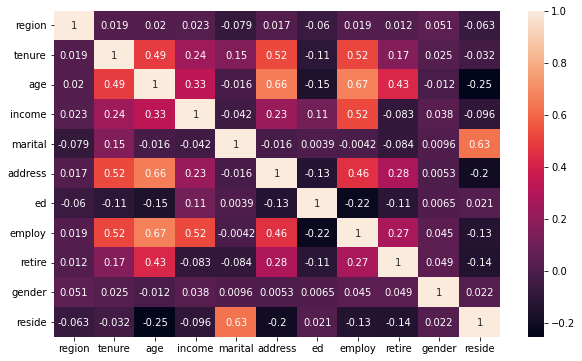

In [ ]:
# Plotting heatmap correlation to see the features relationship
cor = df.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(cor, annot = True)

จากกราฟข้างต้น เราพิจารณาตัดฟีเจอร์ที่มี Correlation น้อยกว่า 0.4 เนื่องจากฟีเจอร์เหล่านี้ไม่ได้มีความสัมพันธ์ใดๆ ดังนั้นฟีเจอร์ที่ต้องนำออกจากโมเดลมีทั้งหมด 7 ฟีเจอร์ ดังนี้
1. `region` 
2. `income`
3. `marital` 
4. `ed` 
5. `retire` 
6. `gender` 
7. `reside`

ลำดับถัดไป เราใช้คำสั่ง `.drop()` ในการลบ 7 ฟีเจอร์ข้างต้นออกจาก DataFrame

In [ ]:
# Dropping the 7 features
df.drop(['region','income','marital','ed','retire','gender','reside'] , axis = 1 , inplace=True)
df.head()

,tenure,age,address,employ
0,13,44,9,5
1,11,33,7,5
2,68,52,24,29
3,33,33,12,0
4,23,30,9,2


เราพล็อต Heatmap เพื่อตรวจดูค่า Correlation ของฟีเจอร์อีกครั้ง เพื่อยืนยันว่าฟีเจอร์แต่ละรายการมีค่า Correlation มากกว่า 0.4 แน่นอน

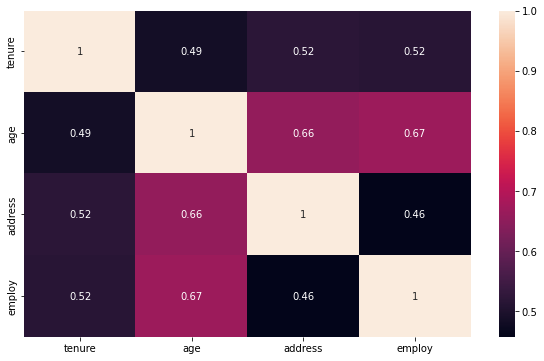

In [ ]:
# Plotting heatmap correlation to see the features relationship
cor = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor, annot=True)

หลังจากนั้นเราพล็อตกราฟด้วยคำสั่ง `.pairplot()` เพื่อดูความสัมพันธ์และการกระจายตัวของข้อมูลในแต่ละฟีเจอร์

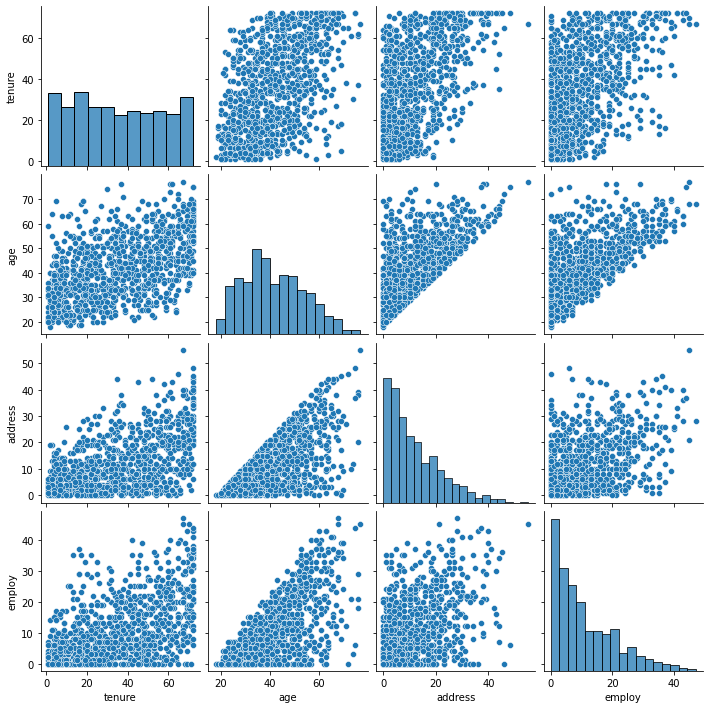

In [ ]:
sns.pairplot(data = df, kind="scatter", markers=["s", "o"])
plt.show()

### 2.3 Data Scaling
เนื่องจากชนิดโมเดลที่เราต้องทำโมเดลประเภท Clustering (KMeans และ Hierachical Clustering) ซึ่งอาศัยการใช้ระยะทางระหว่างจุดในการแยกกลุ่มข้อมูล ดังนั้นการทำ Normalization จึงเป็นสิ่งจำเป็นอย่างยิ่งสำหรับโมเดลประเภทนี้
เพื่อให้ได้โครงสร้างของตารางที่ดีและลดความซ้ำซ้อนของข้อมูลเพื่อหลีกเลี่ยงความผิดปกติของข้อมูลก่อนที่จะนำเข้าโมเดลต่อไป สำหรับการทำ Normlization โดยทั่วไปมี 2 วิธี คือ
1. Standardization
2. Normalization

สำหรับโปรเจคนี้เราเลือกใช้วิธี Standardization เนื่องจากให้ผลลัพธ์โมเดลได้ดีกว่า

In [ ]:
# %%script echo skipping
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# statistics of scaled data
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled.head()

,tenure,age,address,employ
0,-1.054791,0.184239,-0.252179,-0.595386
1,-1.148582,-0.692164,-0.451305,-0.595386
2,1.524456,0.821622,1.241265,1.798666
3,-0.116883,-0.692164,0.046510,-1.094147
4,-0.585837,-0.931183,-0.252179,-0.894643


In [ ]:
%%script echo skipping
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# statistics of scaled data
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled.head()

skipping


## Step-3 Modeling

### Model-1: KMeans
ทำการ plot elbow curve เพื่อหาค่า K ที่เหมาะสม โดยพิจารณาจากจุดหักศอกที่ให้ค่า inertia น้อยที่สุด

Text(0, 0.5, 'Inertia')

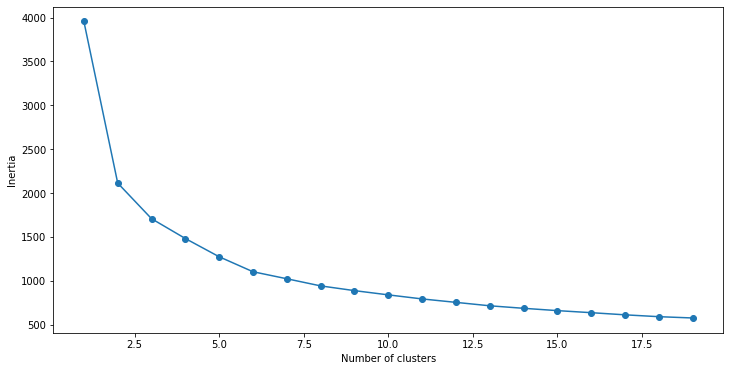

In [ ]:
from sklearn.cluster import KMeans

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_scaled.values)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

จากกราฟข้างต้น พบจุดหักศอกเกิดขึ้นที่ K หรือ Number of clusters มีค่าเท่ากับ 2 ถึง 5 ดังนั้นสำหรับการทำโมเดล เราจะเลือกทำ 4 โมเดลคือ กรณี K = 2 จนถึงกรณี K = 5

#### Model-1.1: KMeans (กำหนดค่า K = 2)

In [ ]:
# k means with n_clusters = 2 and k-means++ initialization
kmeans_2 = KMeans(n_clusters = 2, init='k-means++', random_state = 101)
kmeans_2 = kmeans_2.fit(df_scaled.values)
pred_kmeans_2 = kmeans_2.predict(df_scaled.values)


# Print KMeans Intertia
print('KMeans inertia value (K=2): {:.2f}'.format(kmeans_2.inertia_))
print('-'*50)


# Seeing how many data points in each cluster
df['cluster'] = pred_kmeans_2
print('Data in each cluster 0: ', df['cluster'].value_counts()[0])
print('Data in each cluster 1: ', df['cluster'].value_counts()[1])
print('-'*50)

# Print the statistic values for each cluster
print(df.groupby('cluster').describe().T)

KMeans inertia value (K=2): 2113.88
--------------------------------------------------
Data in each cluster 0:  616
Data in each cluster 1:  373
--------------------------------------------------
cluster                 0           1
tenure  count  616.000000  373.000000
        mean    24.957792   52.890080
        std     16.982674   15.647193
        min      1.000000    9.000000
        25%     10.750000   42.000000
        50%     22.000000   56.000000
        75%     37.250000   67.000000
        max     70.000000   72.000000
age     count  616.000000  373.000000
        mean    34.595779   53.399464
        std      8.709433    8.520608
        min     18.000000   36.000000
        25%     28.000000   47.000000
        50%     34.000000   53.000000
        75%     40.000000   59.000000
        max     69.000000   77.000000
address count  616.000000  373.000000
        mean     6.173701   20.383378
        std      4.979048   10.055515
        min      0.000000    0.000000
      

จากผลลัพธ์การทำโมเดลในกรณีที่ K = 2 พบค่าเฉลี่ยของกลุ่มในแต่ละฟีเจอร์ดังนี้

In [ ]:
print(df.groupby('cluster').mean().T)

cluster          0          1
tenure   24.957792  52.890080
age      34.595779  53.399464
address   6.173701  20.383378
employ    5.665584  19.726542


จากผลลัพธ์ข้างต้น แสดงให้เราเห็นว่าข้อมูลทั้งสองกลุ่ม  มีค่าเฉลี่ยที่แตกต่างกันอย่างชัดเจนทั้ง 4 ฟีเจอร์ ในขั้นตอนต่อไป เราทำการพล็อตกราฟฮิสโตแกรมเพื่อสำรวจดูการกระจายตัวและความแตกต่างของแต่ละกลุ่มในแต่ละฟีเจอร์

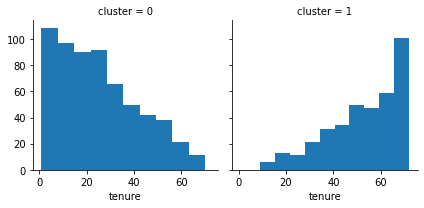

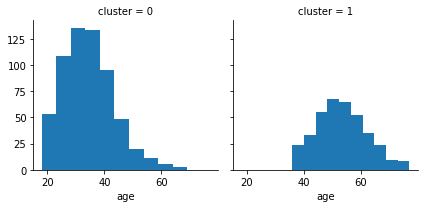

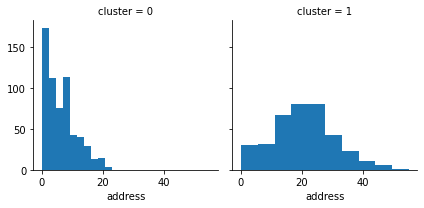

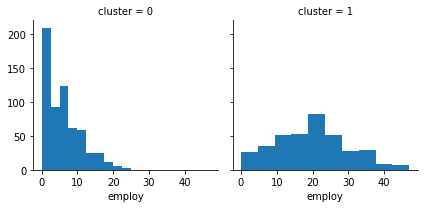

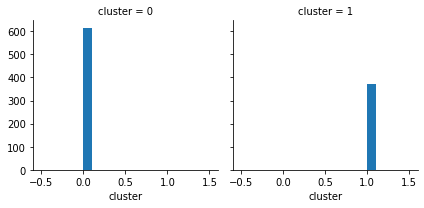

In [ ]:
# Plotting the dist plot to see the distribution of each features for each cluster
for c in df:
    grid= sns.FacetGrid(df, col='cluster')
    grid.map(plt.hist, c)

สุดท้ายนี้ เราดูการแยกกลุ่มคลัสเตอร์เมื่อเทียบฟีเจอร์ต่อฟีเจอร์ ด้วยการใช้คำสั่ง `.pairplot` เพื่อดูการกระจายตัวของข้อมูลในแต่ละกลุ่มคลัสเตอร์

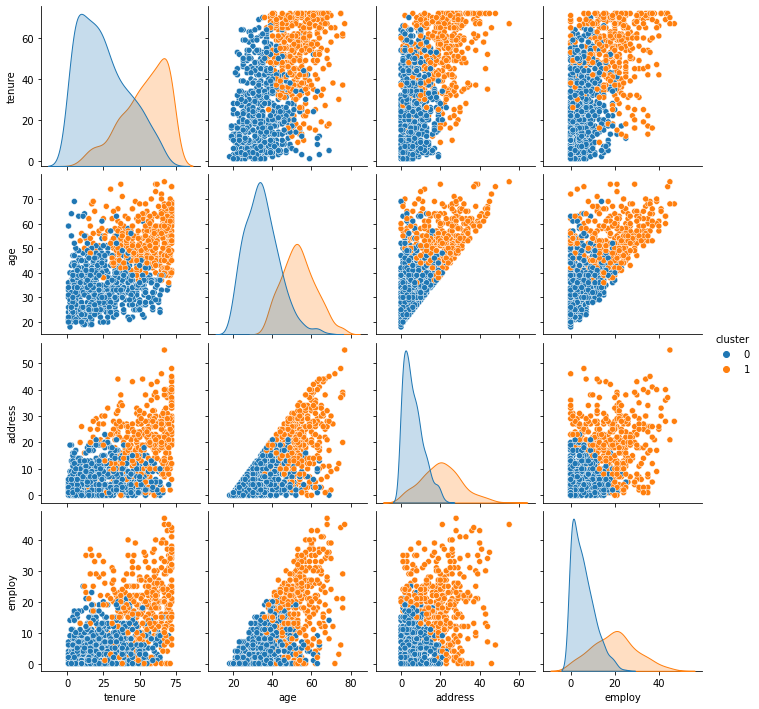

In [ ]:
sns.pairplot(df, hue = "cluster")

#### Model-1.2: KMeans (กำหนดค่า K = 3)

In [ ]:
# k means with n_clusters = 3 and k-means++ initialization
kmeans_3 = KMeans(n_clusters = 3, init='k-means++', random_state = 101)
kmeans_3 = kmeans_3.fit(df_scaled.values)
pred_kmeans_3 = kmeans_3.predict(df_scaled.values)


# Print KMeans Intertia
print('KMeans inertia value (K=3): {:.2f}'.format(kmeans_3.inertia_))
print('-'*50)


# Seeing how many data points in each cluster
df['cluster'] = pred_kmeans_3
print('Data in each cluster 0: ', df['cluster'].value_counts()[0])
print('Data in each cluster 1: ', df['cluster'].value_counts()[1])
print('Data in each cluster 2: ', df['cluster'].value_counts()[2])
print('-'*50)

# Print the statistic values for each cluster
print(df.groupby('cluster').describe().T)

KMeans inertia value (K=3): 1707.80
--------------------------------------------------
Data in each cluster 0:  359
Data in each cluster 1:  417
Data in each cluster 2:  213
--------------------------------------------------
cluster                 0           1           2
tenure  count  359.000000  417.000000  213.000000
        mean    41.557103   18.808153   57.934272
        std     16.225590   13.736764   13.805775
        min      3.000000    1.000000   16.000000
        25%     30.000000    7.000000   51.000000
        50%     42.000000   16.000000   61.000000
        75%     54.000000   27.000000   69.000000
        max     72.000000   64.000000   72.000000
age     count  359.000000  417.000000  213.000000
        mean    44.601671   31.175060   57.356808
        std      7.924581    6.911915    7.528838
        min     28.000000   18.000000   41.000000
        25%     39.000000   26.000000   52.000000
        50%     44.000000   31.000000   57.000000
        75%     50.000000

จากผลลัพธ์การทำโมเดลในกรณีที่ K = 3 พบค่าเฉลี่ยของกลุ่มในแต่ละฟีเจอร์ดังนี้

In [ ]:
print(df.groupby('cluster').mean().T)

cluster          0          1          2
tenure   41.557103  18.808153  57.934272
age      44.601671  31.175060  57.356808
address  11.740947   4.851319  24.262911
employ   11.303621   4.043165  23.962441


จากผลลัพธ์ข้างต้น แสดงให้เราเห็นว่าข้อมูลทั้ง 3 กลุ่ม มีค่าเฉลี่ยที่แตกต่างกันค่อนข้างชัดเจนทั้ง 4 ฟีเจอร์ ในขั้นตอนต่อไป เราทำการพล็อตกราฟฮิสโตแกรมเพื่อสำรวจดูการกระจายตัวและความแตกต่างของแต่ละกลุ่มในแต่ละฟีเจอร์

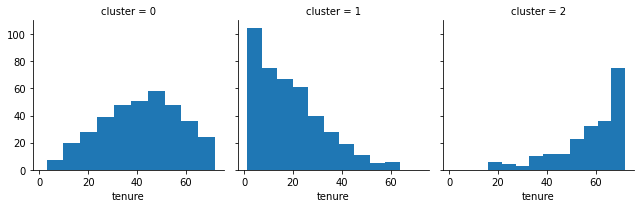

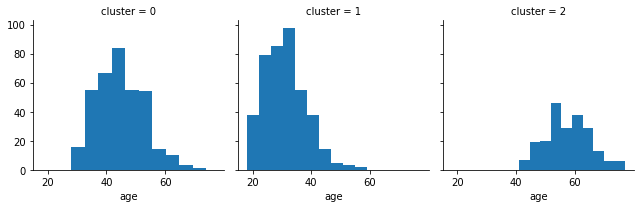

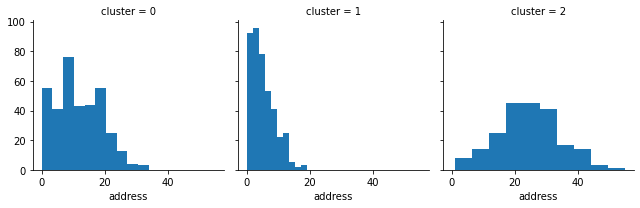

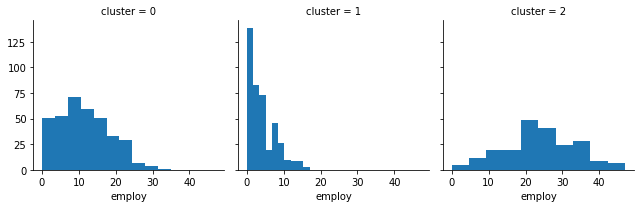

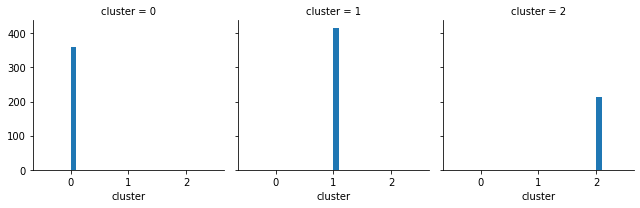

In [ ]:
# Plotting the dist plot to see the distribution of each features for each cluster
for c in df:
    grid= sns.FacetGrid(df, col='cluster')
    grid.map(plt.hist, c)

สุดท้ายนี้ เราดูการแยกกลุ่มคลัสเตอร์เมื่อเทียบฟีเจอร์ต่อฟีเจอร์ ด้วยการใช้คำสั่ง `.pairplot` เพื่อดูการกระจายตัวของข้อมูลในแต่ละกลุ่มคลัสเตอร์

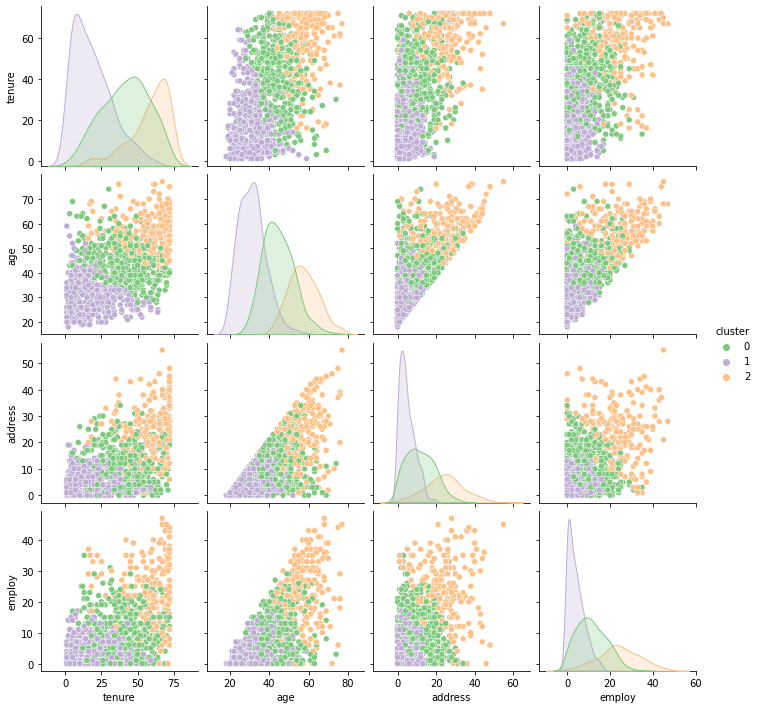

In [ ]:
sns.pairplot(df, hue = "cluster",palette = 'Accent')

จากการพล็อตกราฟข้างต้น จะเห็นการแยกกลุ่มคลัสเตอร์ของฟีเจอร์ `tenure` มีการแยกกลุ่มที่ชัดเจนมากที่สุดเมื่อเทียบคู่กับฟีเจอร์อืื่นๆ ที่อาจมีการแยกกลุ่มยังไม่ชัดเจนหรือแบ่งโซนข้อมูลยังไม่ชัดเจน 

#### Model-1.3: KMeans (กำหนดค่า K = 4)

In [ ]:
# k means with n_clusters = 4 and k-means++ initialization
kmeans_4 = KMeans(n_clusters = 4, init='k-means++', random_state = 101)
kmeans_4 = kmeans_4.fit(df_scaled.values)
pred_kmeans_4 = kmeans_4.predict(df_scaled.values)


# Print KMeans Intertia
print('KMeans inertia value (K=4): {:.2f}'.format(kmeans_4.inertia_))
print('-'*50)


# Seeing how many data points in each cluster
df['cluster'] = pred_kmeans_4
print('Data in each cluster 0: ', df['cluster'].value_counts()[0])
print('Data in each cluster 1: ', df['cluster'].value_counts()[1])
print('Data in each cluster 2: ', df['cluster'].value_counts()[2])
print('Data in each cluster 3: ', df['cluster'].value_counts()[3])
print('-'*50)

# Print the statistic values for each cluster
print(df.groupby('cluster').describe().T)

KMeans inertia value (K=4): 1480.89
--------------------------------------------------
Data in each cluster 0:  345
Data in each cluster 1:  203
Data in each cluster 2:  223
Data in each cluster 3:  218
--------------------------------------------------
cluster                 0           1           2           3
tenure  count  345.000000  203.000000  223.000000  218.000000
        mean    15.063768   60.536946   29.910314   50.211009
        std      9.572945   10.708207   14.134203   10.775098
        min      1.000000   25.000000    1.000000   28.000000
        25%      7.000000   55.000000   19.000000   42.000000
        50%     14.000000   63.000000   30.000000   50.000000
        75%     23.000000   69.000000   41.000000   58.750000
        max     42.000000   72.000000   62.000000   72.000000
age     count  345.000000  203.000000  223.000000  218.000000
        mean    30.866667   56.788177   50.053812   36.192661
        std      6.538319    7.695920    7.249528    6.290915
  

จากผลลัพธ์การทำโมเดลในกรณีที่ K = 4 พบค่าเฉลี่ยของกลุ่มในแต่ละฟีเจอร์ดังนี้

In [ ]:
print(df.groupby('cluster').mean().T)

cluster          0          1          2          3
tenure   15.063768  60.536946  29.910314  50.211009
age      30.866667  56.788177  50.053812  36.192661
address   4.828986  25.443350  11.914798   8.798165
employ    3.660870  22.911330  14.058296   8.252294


จากผลลัพธ์ข้างต้น แสดงให้เราเห็นว่าข้อมูลทั้ง 4 กลุ่ม มีค่าเฉลี่ยที่แตกต่างกันค่อนข้างชัดเจนทั้ง 4 ฟีเจอร์ ในขั้นตอนต่อไป เราทำการพล็อตกราฟฮิสโตแกรมเพื่อสำรวจดูการกระจายตัวและความแตกต่างของแต่ละกลุ่มในแต่ละฟีเจอร์

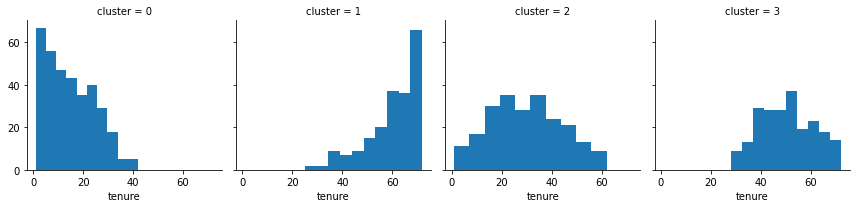

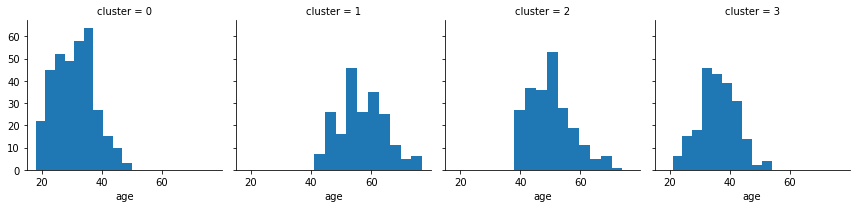

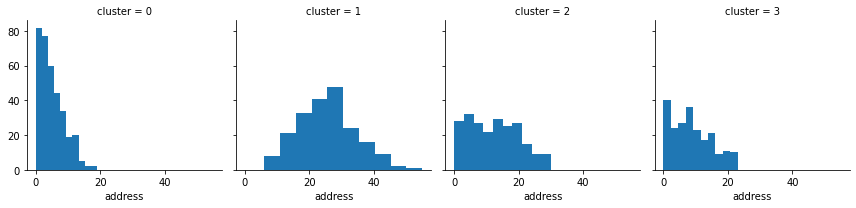

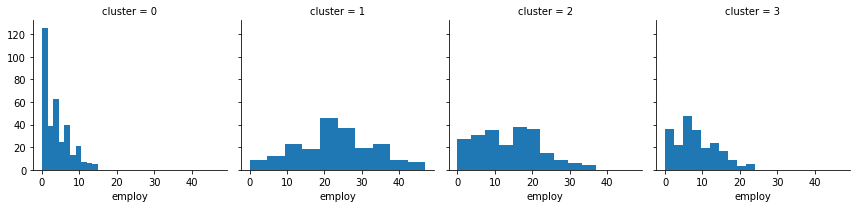

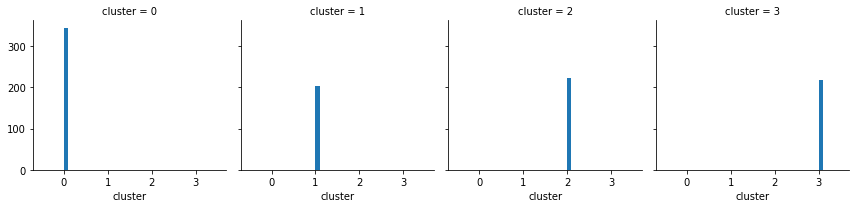

In [ ]:
# Plotting the dist plot to see the distribution of each features for each cluster
for c in df:
    grid= sns.FacetGrid(df, col='cluster')
    grid.map(plt.hist, c)

สุดท้ายนี้ เราดูการแยกกลุ่มคลัสเตอร์เมื่อเทียบฟีเจอร์ต่อฟีเจอร์ ด้วยการใช้คำสั่ง `.pairplot` เพื่อดูการกระจายตัวของข้อมูลในแต่ละกลุ่มคลัสเตอร์

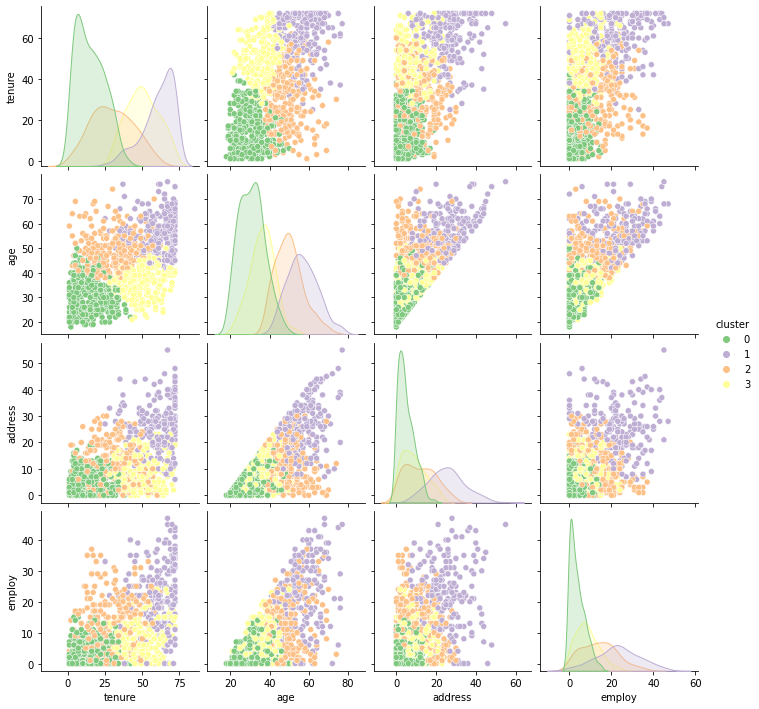

In [ ]:
sns.pairplot(df, hue = "cluster",palette = 'Accent')

จากการพล็อตกราฟข้างต้น จะเห็นการแยกกลุ่มคลัสเตอร์ของฟีเจอร์ `tenure` มีการแยกกลุ่มที่ชัดเจนมากที่สุดเมื่อเทียบคู่กับฟีเจอร์อืื่นๆ ที่อาจมีการแยกกลุ่มยังไม่ชัดเจนหรือแบ่งโซนข้อมูลยังไม่ชัดเจน 

#### Model-1.4: KMeans (กำหนดค่า K = 5)

In [ ]:
# k means with n_clusters = 5 and k-means++ initialization
kmeans_5 = KMeans(n_clusters = 5, init='k-means++', random_state = 101)
kmeans_5 = kmeans_5.fit(df_scaled.values)
pred_kmeans_5 = kmeans_5.predict(df_scaled.values)


# Print KMeans Intertia
print('KMeans inertia value (K=5): {:.2f}'.format(kmeans_5.inertia_))
print('-'*50)


# Seeing how many data points in each cluster
df['cluster'] = pred_kmeans_5
print('Data in each cluster 0: ', df['cluster'].value_counts()[0])
print('Data in each cluster 1: ', df['cluster'].value_counts()[1])
print('Data in each cluster 2: ', df['cluster'].value_counts()[2])
print('Data in each cluster 3: ', df['cluster'].value_counts()[3])
print('Data in each cluster 4: ', df['cluster'].value_counts()[4])
print('-'*50)

# Print the statistic values for each cluster
print(df.groupby('cluster').describe().T)

KMeans inertia value (K=5): 1273.81
--------------------------------------------------
Data in each cluster 0:  163
Data in each cluster 1:  150
Data in each cluster 2:  358
Data in each cluster 3:  118
Data in each cluster 4:  200
--------------------------------------------------
cluster                 0           1           2           3           4
tenure  count  163.000000  150.000000  358.000000  118.000000  200.000000
        mean    37.226994   48.260000   14.114525   62.084746   47.080000
        std     17.070768   16.265181    8.666931   10.809600   10.923839
        min      3.000000   10.000000    1.000000   25.000000   26.000000
        25%     22.500000   35.000000    7.000000   57.250000   38.000000
        50%     38.000000   50.000000   13.000000   65.000000   47.000000
        75%     51.000000   62.750000   21.000000   71.000000   54.250000
        max     72.000000   72.000000   34.000000   72.000000   71.000000
age     count  163.000000  150.000000  358.000000  

จากผลลัพธ์การทำโมเดลในกรณีที่ K = 5 พบค่าเฉลี่ยของกลุ่มในแต่ละฟีเจอร์ดังนี้

In [ ]:
print(df.groupby('cluster').mean().T)

cluster          0          1          2          3       4
tenure   37.226994  48.260000  14.114525  62.084746  47.080
age      51.134969  50.820000  32.036313  58.194915  34.675
address   8.785276  23.533333   5.243017  26.745763   7.055
employ   19.509202   9.286667   4.041899  28.838983   7.125


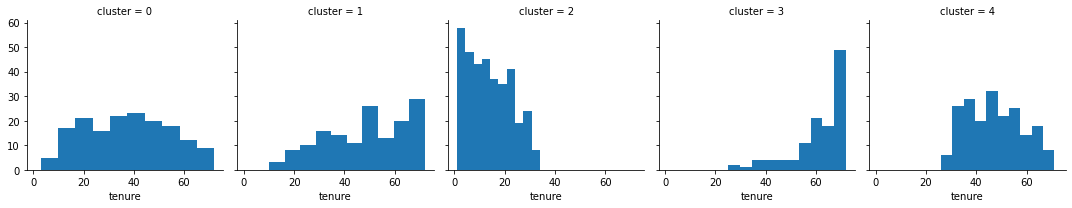

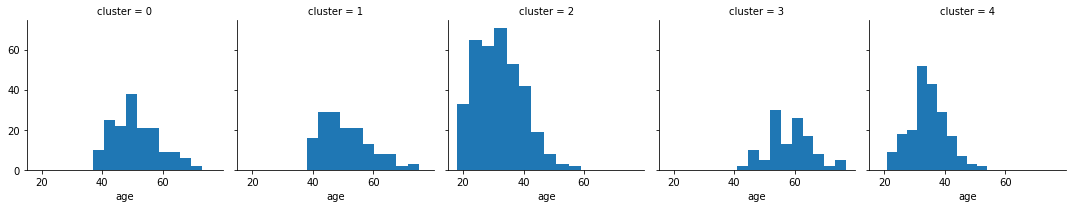

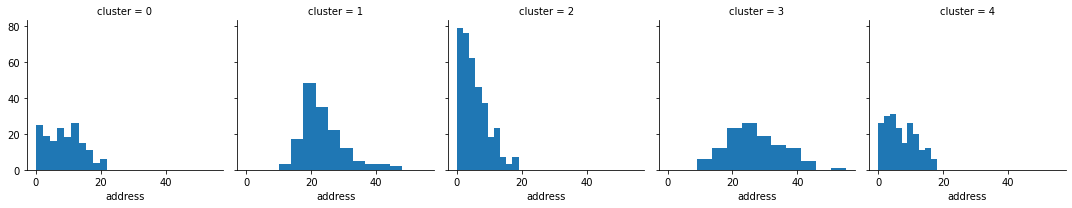

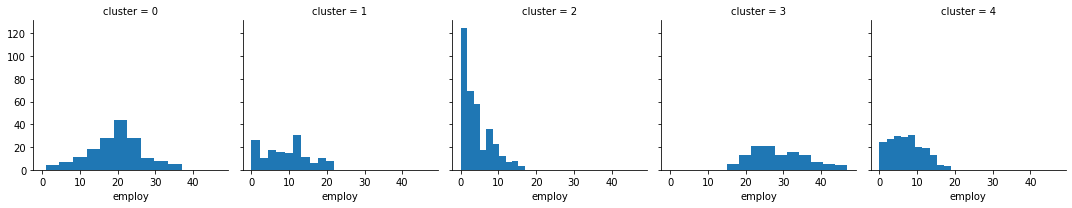

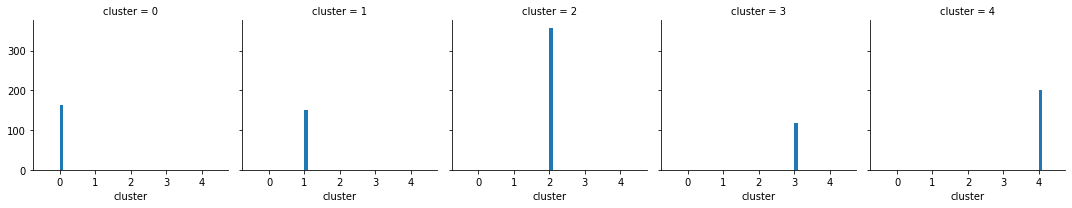

In [ ]:
# Plotting the dist plot to see the distribution of each features for each cluster
for c in df:
    grid= sns.FacetGrid(df, col='cluster')
    grid.map(plt.hist, c)

สุดท้ายนี้ เราดูการแยกกลุ่มคลัสเตอร์เมื่อเทียบฟีเจอร์ต่อฟีเจอร์ ด้วยการใช้คำสั่ง `.pairplot` เพื่อดูการกระจายตัวของข้อมูลในแต่ละกลุ่มคลัสเตอร์

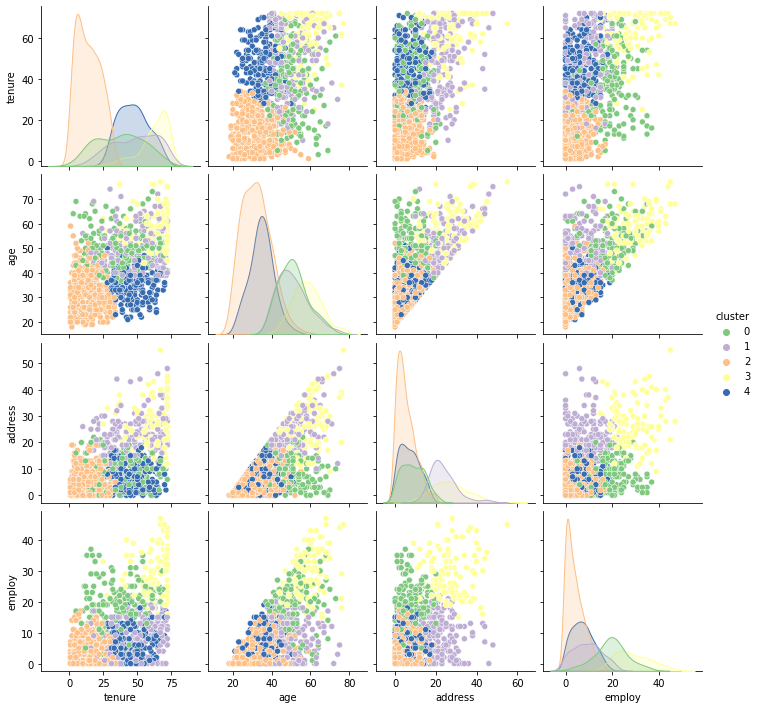

In [ ]:
sns.pairplot(df, hue = "cluster",palette = 'Accent')

จากการพล็อตกราฟข้างต้น พบว่าการแยกกลุ่มคลัสเตอร์ของข้อมูลในกรณี K = 5 ไม่ค่อยชัดเจนและมีการซ้อนทับข้อมูลระหว่างคลัสเตอร์

#### **Assignment Objective - KMeans**
ทำการจัดกลุ่มลูกค้า โดยใช้เทคนิค K-means Clustering

##### **1. จำนวนกลุ่มที่เหมาะสมควรเป็นเท่าไหร่**

จากการทำโมเดลข้างต้น เราสามารถสรุปได้ดังต่อไปนี้
- กรณี **k = 2** จะเห็นได้ว่ากลุ่มคลัสเตอร์ทั้ง 2 กลุ่มมีการแบ่งแยกข้อมูลกันได้อย่างชัดเจนในทุกๆ ฟีเจอร์ แต่การแบ่งกลุ่มในกรณีอาจยังไม่เหมาะสมเนื่องจากข้อมูล 2 กลุ่มนี้อาจดูกว้างเกินไป

- กรณี **k = 3** จะเห็นได้ว่ากลุ่มคลัสเตอร์ทั้ง 3 กลุ่มมีการแบ่งแยกข้อมูลกันได้อย่างชัดเจนในทุกๆ ฟีเจอร์

- กรณี **k = 4** จะเห็นได้ว่ากลุ่มคลัสเตอร์ทั้ง 4 กลุ่มมีการแบ่งแยกข้อมูลกันไม่ค่อยชัดเจนมากนัก มีเพียงฟีเจอร์ `tenure` ที่แบ่งแยกข้อมูลได้ค่อนข้างชัดเจน แต่ในฟีเจอร์อื่นพบว่ากลุ่มข้อมูลเกิดการ overfit เกินไป 

- กรณี **k = 5** จะเห็นได้ว่ากลุ่มคลัสเตอร์ทั้ง 5 กลุ่มมีการแบ่งแยกข้อมูลกันไม่ชัดเจนและเกิดการ overfit มากเกินไป เนื่องจากการปะปนของข้อมูลในแต่ละกลุ่มคลัสเตอร์ 

ดังนั้นจากโมเดลทั้งหมดข้างต้น จะเห็นว่าการแบ่งกลุ่มคลัสเตอร์เป็น 3 กลุ่ม (K =3) ของโมเดล KMeans ให้ผลลัพธ์ที่เหมาะสมที่สุด 



##### **2. อธิบายความแตกต่างระหว่างแต่ละกลุ่มที่จัดออกมาได้**

สำหรับความแตกต่างระหว่างกลุ่มที่จัดออกมาได้ทั้งหมด 3 กลุ่ม สามารถอธิบายความแตกต่างในแต่ละฟีเจอร์ได้ดังต่อไปนี้

1. ฟีเจอร์ `tenure`

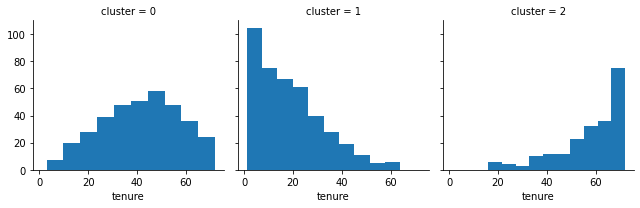

เมื่อพิจารณาฟีเจอร์ `tenure` ในที่นี้เราให้ความหมายฟีเจอร์นี้ว่า ระยะเวลาการดำรงตำแหน่งของพนักงาน โดยพบว่า
- กลุ่มคลัสเตอร์ 0 มีค่า tenure เกาะกลุ่มกันมากช่วงช่วง 40 - 60
- กลุ่มคลัสเตอร์ 1 มีค่า tenure เกาะกลุ่มกันมากช่วงช่วง 0 - 20 
- กลุ่มคลัสเตอร์ 2 มีค่า tenure เกาะกลุ่มกันมากช่วงช่วง 50 - 70 

หมายความว่ากลุ่มคลัสเตอร์ 2 เป็นกลุ่มพนักงานที่ดำรงตำแหน่งงานยาวนานมากที่สุด รองลงมาคือกลุ่มคลัสเตอร์ 0 และน้อยที่สุดคือกลุ่มคลัสเตอร์ 1

2. ฟีเจอร์ `age`

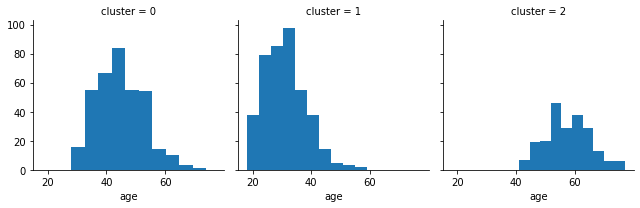

เมื่อพิจารณาฟีเจอร์ `age` ในที่นี้เราให้ความหมายฟีเจอร์นี้ว่า อายุของพนักงาน โดยพบว่า
- กลุ่มคลัสเตอร์ 0 มีค่า `age` เกาะกลุ่มกันมากช่วงช่วง 35 - 45
- กลุ่มคลัสเตอร์ 1 มีค่า `age` เกาะกลุ่มกันมากช่วงช่วง 20 - 40 
- กลุ่มคลัสเตอร์ 2 มีค่า `age` เกาะกลุ่มกันมากช่วงช่วง 45 - 65 

หมายความว่ากลุ่มคลัสเตอร์ 2 เป็นกลุ่ม
ที่มีอายุมากที่สุด รองลงมาคือกลุ่มคลัสเตอร์ 0 และน้อยที่สุดคือกลุ่มคลัสเตอร์ 1

3. ฟีเจอร์ `address`

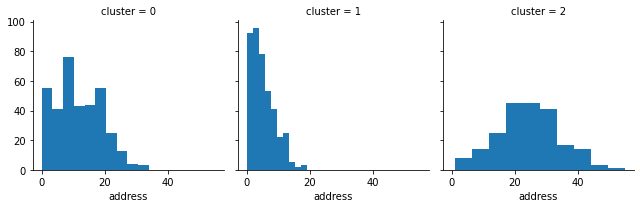

เมื่อพิจารณาฟีเจอร์ `address` ในที่นี้เราให้ความหมายฟีเจอร์นี้ว่าโซนที่พักอาศัยของพนักงาน โดยพบว่า
- กลุ่มคลัสเตอร์ 0 มีค่า `address` เกาะกลุ่มกันมากช่วงช่วง 0 - 20
- กลุ่มคลัสเตอร์ 1 มีค่า `address` เกาะกลุ่มกันมากช่วงช่วง 0 - 10 
- กลุ่มคลัสเตอร์ 2 มีค่า `address` เกาะกลุ่มกันมากช่วงช่วง 15 - 35 

หมายความว่ากลุ่มคลัสเตอร์ 1 เป็นกลุ่มพนักงานที่มีโซนที่พักอาศัยใกล้กันมากที่สุด รองลงมาคือกลุ่มคลัสเตอร์ 0 และน้อยที่สุดหรือมีโซนที่พักอาศัยแตกต่างกันที่สุดคือกลุ่มคลัสเตอร ์ 2

4. ฟีเจอร์ `employ`

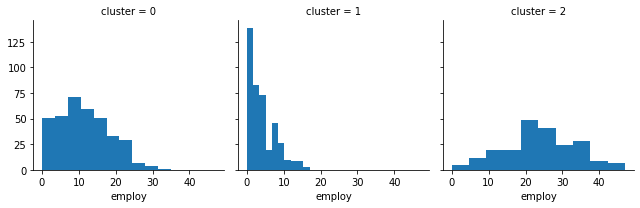

เมื่อพิจารณาฟีเจอร์ `employ` ในที่นี้เราให้ความหมายฟีเจอร์นี้ว่าอายุงานของพนักงาน โดยพบว่า
- กลุ่มคลัสเตอร์ 0 มีค่า `employ` เกาะกลุ่มกันมากช่วงช่วง 0 - 20
- กลุ่มคลัสเตอร์ 1 มีค่า `employ` เกาะกลุ่มกันมากช่วงช่วง 0 - 10 
- กลุ่มคลัสเตอร์ 2 มีค่า `employ` เกาะกลุ่มกันมากช่วงช่วง 15 - 35 

หมายความว่ากลุ่มคลัสเตอร์ 2 เป็นกลุ่มพนักงานที่มีอายุงานมากที่สุด รองลงมาคือกลุ่มคลัสเตอร์ 0 และน้อยที่สุดคือกลุ่มคลัสเตอร์ 1

### Model-2: Heirachical clustering
ก่อนเริ่มต้นการทำโมเดล `Heirachical clustering` เรานำข้อมูลที่ผ่านการทำโมเดล KMeans ในขั้นตอนก่อนหน้านี้มาใช้งานต่อ แต่ต้องลบคอลัมน์ `cluster` ที่ได้จากการทำโมเดล KMeans ออกไปด้วยคำสั่ง `.drop()`

In [ ]:
df.drop('cluster' , axis = 1 , inplace=True)

ทำการ Standardlization ข้อมูลก่อนเข้าโมเดล `Heirachical clustering`

In [ ]:
# standardizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_hrc = scaler.fit_transform(df)

# statistics of scaled data
df_hrc = pd.DataFrame(df_hrc, columns=df.columns)
df_hrc.head()

,tenure,age,address,employ
0,0.169014,0.440678,0.163636,0.106383
1,0.140845,0.254237,0.127273,0.106383
2,0.943662,0.576271,0.436364,0.617021
3,0.450704,0.254237,0.218182,0.000000
4,0.309859,0.203390,0.163636,0.042553


ทำการวาดกราฟ Dendrogram เพื่อช่วยดูผลลัพธ์ว่าควรจะใช้กี่กลุ่มคลัสเตอร์ หลังจากการพล็อตเรากำหนดเส้นตัดที่ y = 6 เนื่องจากเป็นบริเวณจุดตัดที่พบเส้นแนวตั้งยาวที่สุด 

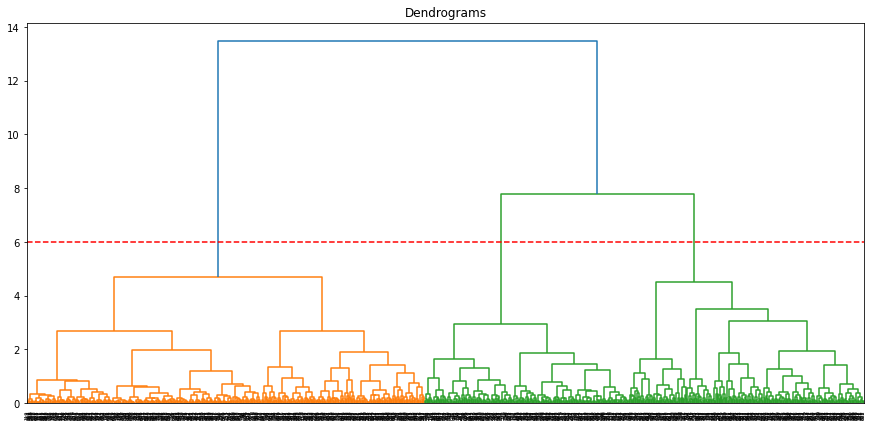

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 7))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_hrc, method='ward'))
plt.axhline(y = 6, color='r', linestyle='--')

หลังจากนั้นใช้ `Agglomerative Clustering`  โดยกำหนดกลุ่ม `cluster = 3` เนื่องจากเลือกจุดตัดแกน  y = 6 ซึ่งจะได้ชุดข้อมูลของแต่ละกลุ่มคลัสเตอร์ ที่มีความใกล้เคียงกันมากที่สุดโดยดูจากเส้นระยะทาง เมื่อดูจากภาพ dendrogram จะใช้วิธี ward ดูระยะทาง avg ของ cluster โดยจะใช้ euclidean distance มาคำนวณ

In [ ]:
# Fitting model
from sklearn.cluster import AgglomerativeClustering
hrc_model = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')  
hrc_pred = hrc_model.fit_predict(df_hrc)


# Seeing how many data points in each cluster
df['cluster'] = hrc_pred
df['cluster'].value_counts()

0    470
1    278
2    241
Name: cluster, dtype: int64

จากผลลัพธ์การทำโมเดลในกรณีที่ พบค่าเฉลี่ยของกลุ่มในแต่ละฟีเจอร์ดังนี้

In [ ]:
print(df.groupby('cluster').mean().T)

cluster          0          1          2
tenure   16.770213  55.748201  48.639004
age      35.395745  55.392086  38.149378
address   7.263830  22.003597   7.780083
employ    5.278723  21.996403   9.344398


ทำการ `group` คอลัมน์ `cluster`ที่ K = 3 เพื่อดูค่า mean ของแต่ละ cluster ที่มีความแตกต่างกันตามลำดับ
*   tenure : 16.77 ,	55.74 ,	48.63
*   age : 35.39 ,	55.39 ,	38.14
*   address : 7.26 ,	22.00 ,	7.78
*   employ : 5.27 , 21.99 ,	9.34

จะเห็นได้ว่าทุกคอลัมน์จะมีค่า mean ของแต่ละ cluster ที่ใกล้เคียงกันได้แก่ 
*   tenure : cluster 1,2 มีค่า mean ที่ใกล้เคียงกัน
*   age : cluster 0,2 มีค่า mean ที่ใกล้เคียงกัน
*   address : cluster 0,2 มีค่า mean ที่ใกล้เคียงกัน
*   employ : cluster 0,2 มีค่า mean ที่ใกล้เคียงกัน

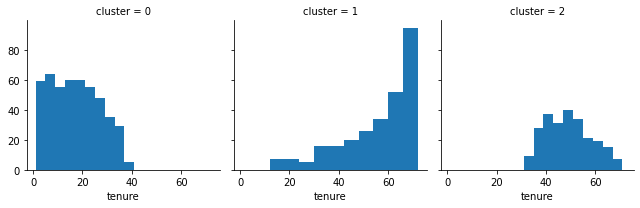

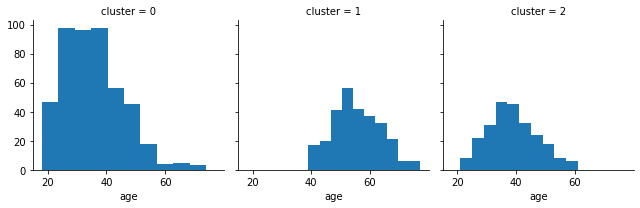

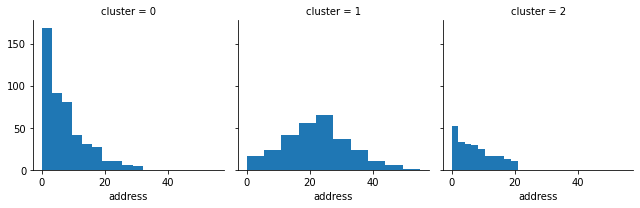

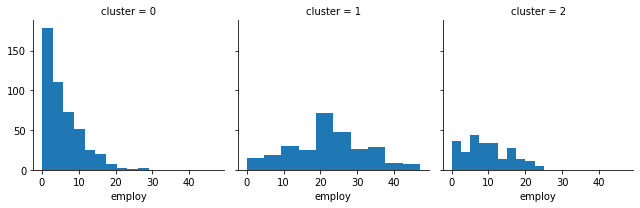

In [ ]:
# Plotting the dist plot to see the distribution of each features for each cluster
for c in df_hrc:
    grid= sns.FacetGrid(df, col='cluster')
    grid.map(plt.hist, c)

สุดท้ายนี้ เราดูการแยกกลุ่มคลัสเตอร์เมื่อเทียบฟีเจอร์ต่อฟีเจอร์ ด้วยการใช้คำสั่ง `.pairplot` เพื่อดูการกระจายตัวของข้อมูลในแต่ละกลุ่มคลัสเตอร์

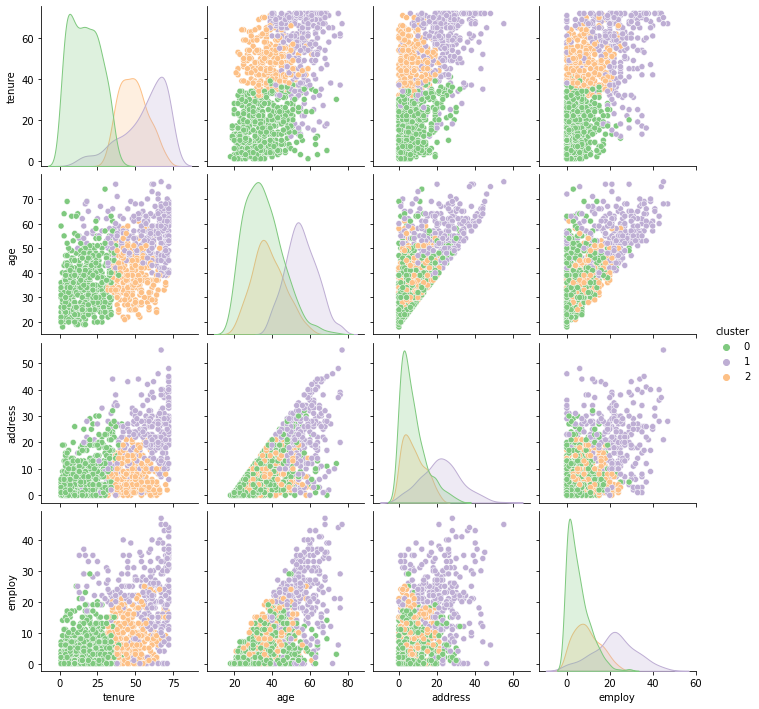

In [ ]:
sns.pairplot(df, hue = "cluster" ,palette = 'Accent')

#### **Assignment Objective - Hierachical Clustering**
ทำการจัดกลุ่มลูกค้า โดยใช้เทคนิค Hierachical Clustering

##### **1. จำนวนกลุ่มที่เหมาะสมควรเป็นเท่าไหร่**

จากการทำโมเดลข้างต้น จำนวนกลุ่มที่เหมาะสมที่สุดคือ 3 กลุ่มคลัสเตอร์ เนื่องจากการพล็อตกราฟ Dendogram แสดงให้เห็นเส้นแนวตั้งที่ยาวที่สุดเมื่อเรากำหนดเส้นจุดตัดแกน y ที่ประมาณ 6



##### **2. อธิบายความแตกต่างระหว่างแต่ละกลุ่มที่จัดออกมาได้**

สำหรับความแตกต่างระหว่างกลุ่มที่จัดออกมาได้ทั้งหมด 3 กลุ่ม สามารถอธิบายความแตกต่างในแต่ละฟีเจอร์ได้ดังต่อไปนี้

1. ฟีเจอร์ `tenure`

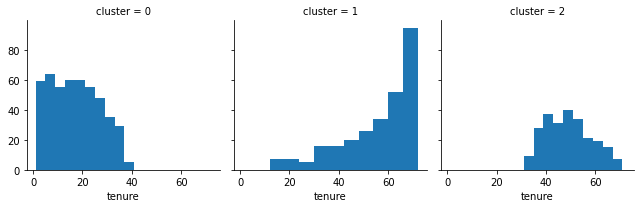

เมื่อพิจารณาฟีเจอร์ `tenure` ในที่นี้เราให้ความหมายฟีเจอร์นี้ว่า ระยะเวลาการดำรงตำแหน่งของพนักงาน โดยพบว่า
- กลุ่มคลัสเตอร์ 0 มีค่า tenure เกาะกลุ่มกันมากช่วงช่วง 0 - 40
- กลุ่มคลัสเตอร์ 1 มีค่า tenure เกาะกลุ่มกันมากช่วงช่วง 35 - 70 
- กลุ่มคลัสเตอร์ 2 มีค่า tenure เกาะกลุ่มกันมากช่วงช่วง 35 - 65 

หมายความว่ากลุ่มคลัสเตอร์ 1 เป็นกลุ่มพนักงานที่ดำรงตำแหน่งงานยาวนานมากที่สุด รองลงมาคือกลุ่มคลัสเตอร์ 2 และน้อยที่สุดคือกลุ่มคลัสเตอร์ 0

2. ฟีเจอร์ `age`




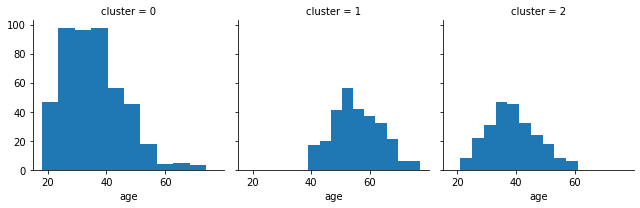

เมื่อพิจารณาฟีเจอร์ `age` ในที่นี้เราให้ความหมายฟีเจอร์นี้ว่า อายุของพนักงาน โดยพบว่า
- กลุ่มคลัสเตอร์ 0 มีค่า `age` เกาะกลุ่มกันมากช่วงช่วง 20 - 45
- กลุ่มคลัสเตอร์ 1 มีค่า `age` เกาะกลุ่มกันมากช่วงช่วง 40 - 65 
- กลุ่มคลัสเตอร์ 2 มีค่า `age` เกาะกลุ่มกันมากช่วงช่วง 20 - 40 

หมายความว่ากลุ่มคลัสเตอร์ 1 เป็นกลุ่ม
ที่มีอายุมากที่สุด รองลงมาคือกลุ่มคลัสเตอร์ 2 และน้อยที่สุดคือกลุ่มคลัสเตอร์ 0

3. ฟีเจอร์ `address`

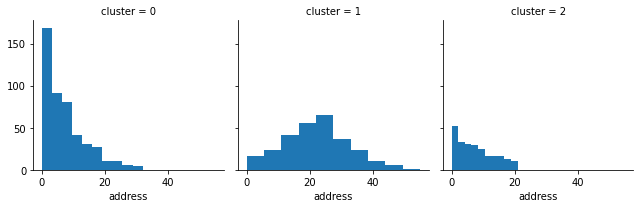

เมื่อพิจารณาฟีเจอร์ `address` ในที่นี้เราให้ความหมายฟีเจอร์นี้ว่าโซนที่พักอาศัยของพนักงาน โดยพบว่า
- กลุ่มคลัสเตอร์ 0 มีค่า `address` เกาะกลุ่มกันมากช่วงช่วง 0 - 20
- กลุ่มคลัสเตอร์ 1 มีค่า `address` เกาะกลุ่มกันมากช่วงช่วง 15 - 35 
- กลุ่มคลัสเตอร์ 2 มีค่า `address` เกาะกลุ่มกันมากช่วงช่วง 0 - 20 

หมายความว่ากลุ่มคลัสเตอร์ 0,2 เป็นกลุ่มพนักงานที่มีโซนที่พักอาศัยใกล้กันมากที่สุด แต่กลุ่มคลัสเตอร์ 1 เป็นกลุ่มที่พนักงานมีโซนที่พักอาศัยแตกต่างกันที่สุด

4. ฟีเจอร์ `employ`

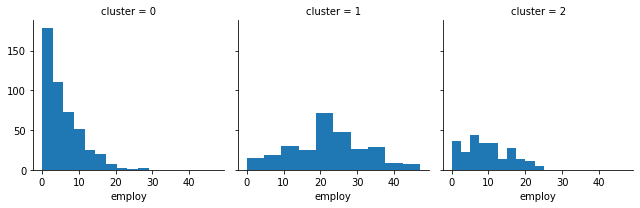

เมื่อพิจารณาฟีเจอร์ `employ` ในที่นี้เราให้ความหมายฟีเจอร์นี้ว่าอายุงานของพนักงาน โดยพบว่า
- กลุ่มคลัสเตอร์ 0 มีค่า `employ` เกาะกลุ่มกันมากช่วงช่วง 0 - 20
- กลุ่มคลัสเตอร์ 1 มีค่า `employ` เกาะกลุ่มกันมากช่วงช่วง 0 - 45 
- กลุ่มคลัสเตอร์ 2 มีค่า `employ` เกาะกลุ่มกันมากช่วงช่วง 0 - 20 

หมายความว่ากลุ่มคลัสเตอร์ 2 เป็นกลุ่มพนักงานที่มีอายุงานมากที่สุด และกลุ่มคลัสเตอร์ 0, 2 เป็นกลุ่มที่มีอายุงานน้อยที่สุด โดยเฉพาะกลุ่มคลัสเตอร์ 0 ทีมีจำนวนพนักงานอายุน้อยมากกว่ากลุ่มคลัสเตอร์ 2

### Assignment Objective - K-means Clustering VS. Hierarchical Clustering

##### **3. สำหรับโจทย์ข้อนี้ คุณคิดว่าวิธีไหนจัดกลุ่มออกมาได้ดีกว่า K-means Clustering VS. Hierarchical Clustering**

กลุ่มเราคิดว่าการเลือกใช้โมเดล K-means clustering จัดกลุ่มข้อมูลได้ดีมากกว่า Hierarchical Clustering โดยมีเหตุผลการตัดสินใจดังนี้
1.   เนื่องจากมีชุดข้อมูลของพนักงานมากกว่า 200 คน การแบ่งกลุ่มคลัสเตอร์ KMeans จะให้ผลลัพธ์ที่ดีกว่า 
2.   โมเดล KMeans ใช้ระยะเวลาในการหาผลลัพธ์ของข้อมูลค่อนข้างที่จะน้อย
3.   โมเดล KMeans สามารถแบ่งสมาชิกของข้อมูลในแต่ละกลุ่มคลัสเตอร์สมดุลกว่าโมเดล Hierarchical Clustering

  * K-means Clustering

       cluster 0 : 359
       
       cluster 1 : 417
       
       cluster 2 : 213

  * Hierarchical Clustering

       cluster 0 : 470

       cluster 1 : 278

       cluster 2 : 241


4. โมเดล KMeans มีค่าเฉลี่ยในแต่ละคอลัมน์ที่แตกต่างกันอย่างชัดเจนในแต่ละกลุ่มคลัสเตอร์ เมื่อเทียบกับโมเดล Hierarchical Clustering ที่พบว่าแต่ละกลุ่มคลัสเตอร์มีค่าเฉลี่ยคล้ายๆ กันอยู่ในแต่ละคอลัมน์ดังนี้

  * K-means Clustering  

      tenure : 41.55 , 18.80	, 57.93

      age : 44.60 ,	31.17 ,	57.35
       
      address : 11.74 ,	4.85 , 24.26

      employ : 11.30 , 4.04 ,	23.96

  *  Hierarchical Clustering

      tenure : 16.77 , 55.74 , 48.63

      age : 35.39 , 55.39 , 38.14

      address : 7.26 , 22.00 , 7.78
      
      employ : 5.27 , 21.99 , 9.34

5.   การที่ค่าเฉลี่ยต่างกันมากในแต่ละกลุ่มคลัสเตอร์ของโมเดล KMeans จึงทำให้ข้อมูลมีการแบ่งกลุ่มได้อย่างชัดเจนมากกว่าโมเดล Hierarchical Clustering






